In [1]:
import numpy as np
import matplotlib.pyplot as plt
import GPy

import sys
sys.path.append('../')
import cov_tools

# Covariance menu

An illustrated description of each covariance matrix available in GPy, including what samples drawn from a random distribution with this covariance and zero mean would look like.

In [2]:
X = np.arange(899, 1184, 1) # frequency range in MHz

## Covariance kernels with lengthscales

First setting a small lengthscale (things correlated on short instead of long scales)

lengthscale = 2 MHz

These are the covariance kernels that have lengthscale parameters:

In [3]:
kern_wlen = ['Cosine', 'ExpQuad', 'Exponential', 'GridRBF', 'Matern32', 'Matern52', 'OU', 'PeriodicExponential',
            'PeriodicMatern32', 'PeriodicMatern52', 'RBF', 'RatQuad', 'StdPeriodic']

These are their class functions and functional forms:

### Cosine:  

- class: Cosine(input_dim, variance=1.0, lengthscale=None, ARD=False, active_dims=None, name='Cosine')
- functional form: $ r(x, x') = \sqrt{\sum_{q=1}^Q (x_q - x'_q)^2} $

### ExpQuad: 

- The Exponentiated quadratic covariance function.
- class: ExpQuad(input_dim, variance=1.0, lengthscale=None, ARD=False, active_dims=None, name='ExpQuad')
- functional form: $k(r) = \sigma^2 (1 + \sqrt{5} r + \frac53 r^2) \exp(- \sqrt{5} r)$

### Exponential:  

- class: Exponential(input_dim, variance=1.0, lengthscale=None, ARD=False, active_dims=None, name='Exponential')
- functional form: $r(x, x') = \sqrt{ \sum_{q=1}^Q (x_q - x'_q)^2 }$

### GridRBF:  

- Similar to regular RBF but supplemented with methods required for Gaussian grid regression Radial Basis Function kernel, aka squared-exponential, exponentiated quadratic or Gaussian kernel
- class: GridRBF(input_dim, variance=1.0, lengthscale=None, ARD=False, active_dims=None, name='gridRBF', originalDimensions=1, useGPU=False)
- functional form: $k(r) = \sigma^2 \exp \bigg(- \frac{1}{2} r^2 \bigg)$

### Matern 32:  

- Matern 3/2 kernel
- class: Matern32(input_dim, variance=1.0, lengthscale=None, ARD=False, active_dims=None, name='Mat32')
- functional form: $k(r) = \sigma^2 (1 + \sqrt{3} r) \exp(- \sqrt{3} r) \\ \\ \\ \\  \text{ where  } r = \sqrt{\sum_{i=1}^{\text{input_dim}} \frac{(x_i-y_i)^2}{\ell_i^2} }$

### Matern 52:  

- Matern 5/2 kernel
- class: Matern52(input_dim, variance=1.0, lengthscale=None, ARD=False, active_dims=None, name='Mat52')
- functional form: $k(r) = \sigma^2 (1 + \sqrt{5} r + \frac53 r^2) \exp(- \sqrt{5} r)$

### OU:  

- class: OU(input_dim, variance=1.0, lengthscale=None, ARD=False, active_dims=None, name='OU')
- functional form: $k(r) = \sigma^2 \exp(- r) \\ \\ \\ \\  \text{ where  } r = \sqrt{\sum_{i=1}^{\text{input_dim}} \frac{(x_i-y_i)^2}{\ell_i^2} }$

### PeriodicExponential:

- Kernel of the periodic subspace (up to a given frequency) of a exponential (Matern 1/2) RKHS. Only defined for input_dim=1.
- class: PeriodicExponential(input_dim=1, variance=1.0, lengthscale=1.0, period=6.283185307179586, n_freq=10, lower=0.0, upper=12.566370614359172, active_dims=None, name='periodic_exponential')

### PeriodicMatern32:

- Kernel of the periodic subspace (up to a given frequency) of a Matern 3/2 RKHS. Only defined for input_dim=1.
- class: PeriodicMatern32(input_dim=1, variance=1.0, lengthscale=1.0, period=6.283185307179586, n_freq=10, lower=0.0, upper=12.566370614359172, active_dims=None, name='periodic_Matern32')

### PeriodicMatern52:

- Kernel of the periodic subspace (up to a given frequency) of a Matern 5/2 RKHS. Only defined for input_dim=1.
- class: PeriodicMatern52(input_dim=1, variance=1.0, lengthscale=1.0, period=6.283185307179586, n_freq=10, lower=0.0, upper=12.566370614359172, active_dims=None, name='periodic_Matern52')

### RBF:

- Radial Basis Function kernel, aka squared-exponential, exponentiated quadratic or Gaussian kernel
- class: RBF(input_dim, variance=1.0, lengthscale=None, ARD=False, active_dims=None, name='rbf', useGPU=False, inv_l=False)
- functional form: $k(r) = \sigma^2 \exp \bigg(- \frac{1}{2} r^2 \bigg)$

### RatQuad:

- Rational Quadratic Kernel
- class: RatQuad(input_dim, variance=1.0, lengthscale=None, power=2.0, ARD=False, active_dims=None, name='RatQuad')
- functional form: $k(r) = \sigma^2 \bigg( 1 + \frac{r^2}{2} \bigg)^{- \alpha}$

### StdPeriodic:

- Standart periodic kernel
- class: StdPeriodic(input_dim, variance=1.0, period=None, lengthscale=None, ARD1=False, ARD2=False, active_dims=None, name='std_periodic', useGPU=False)

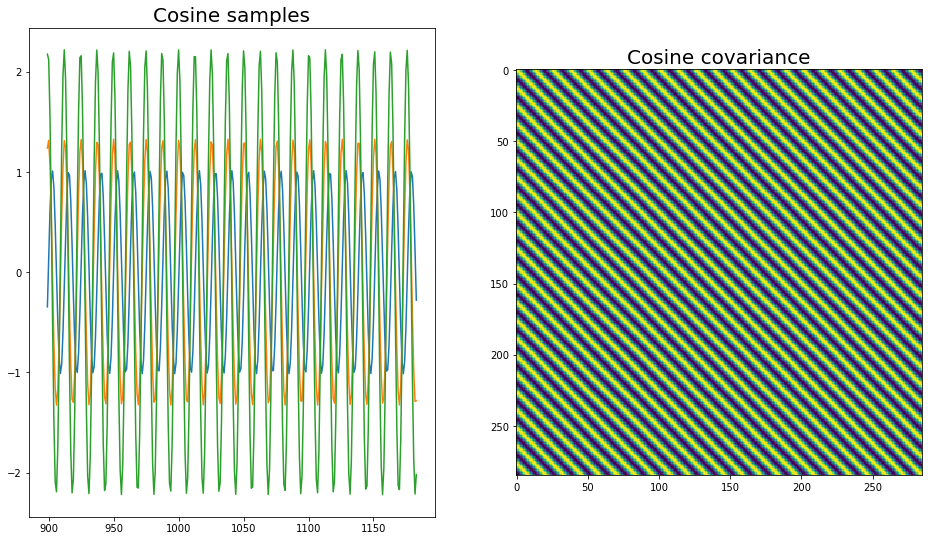

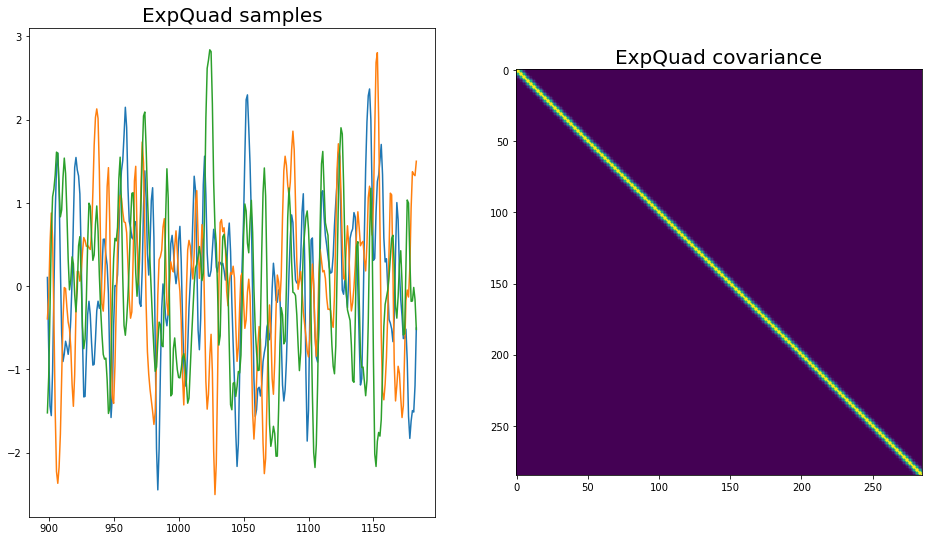

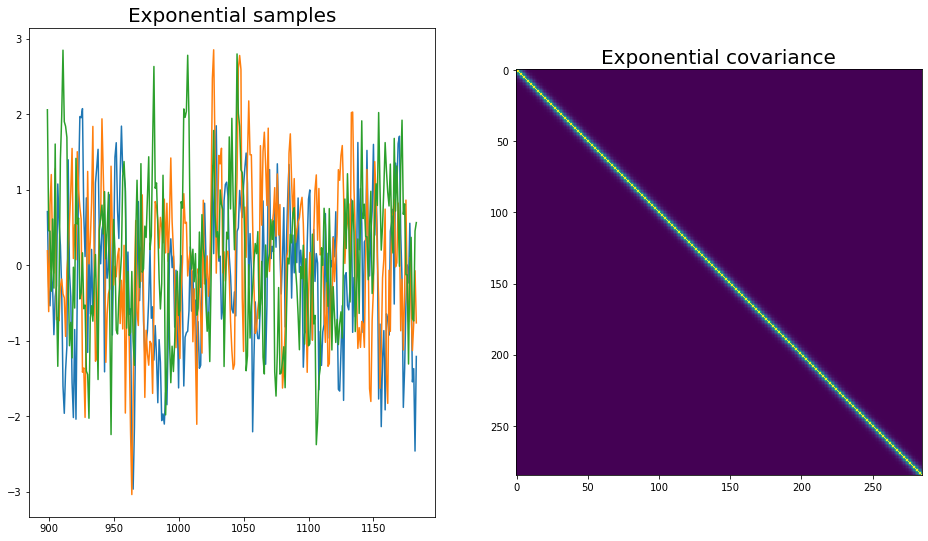

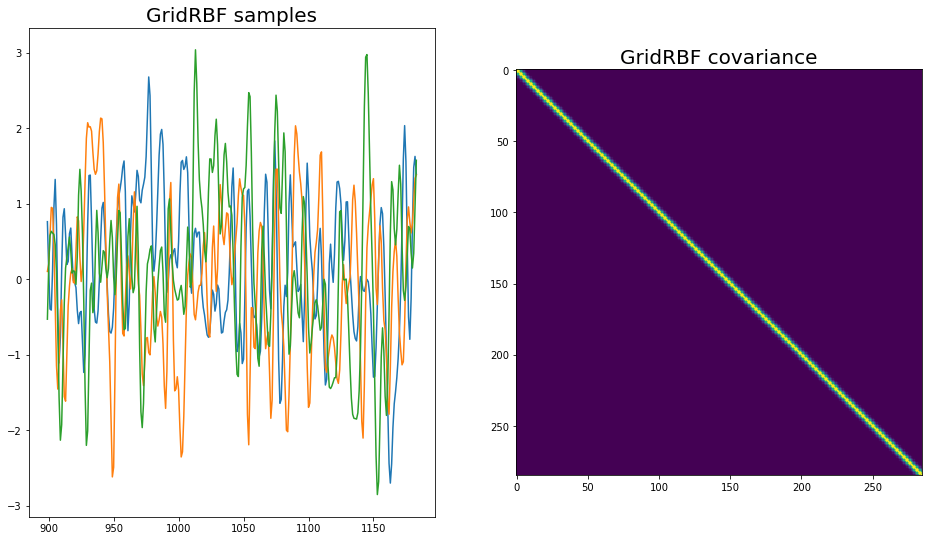

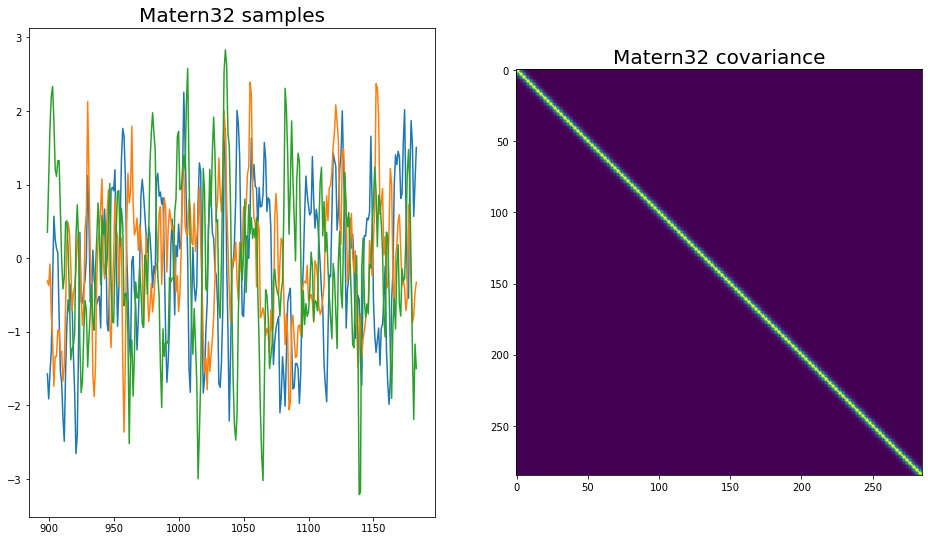

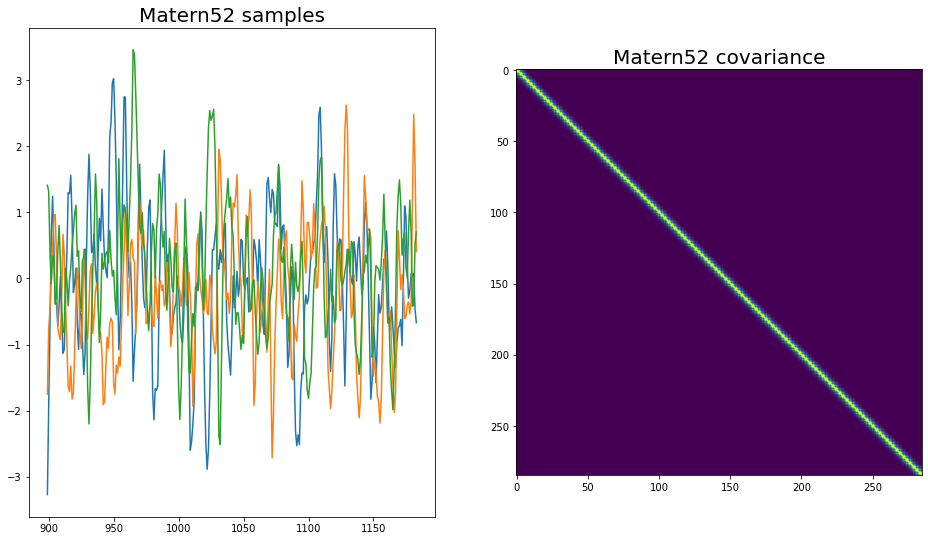

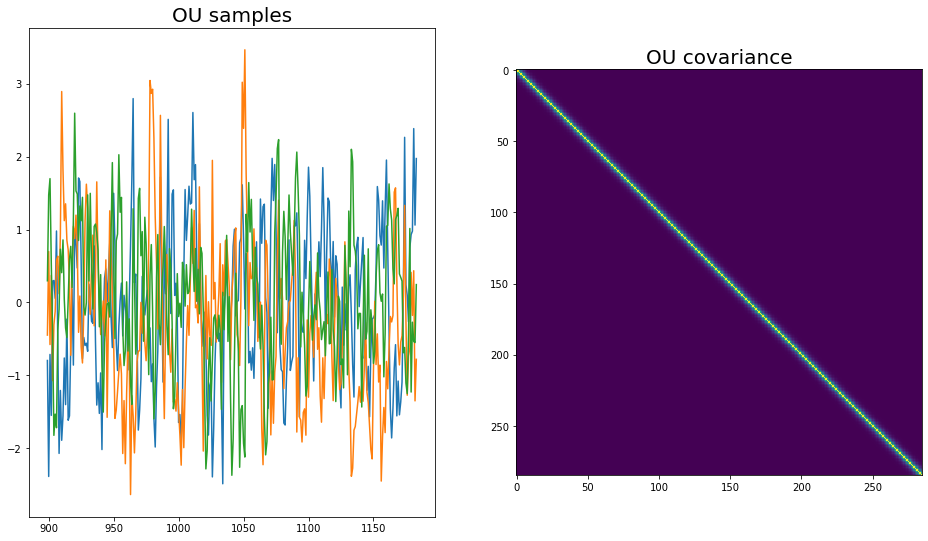

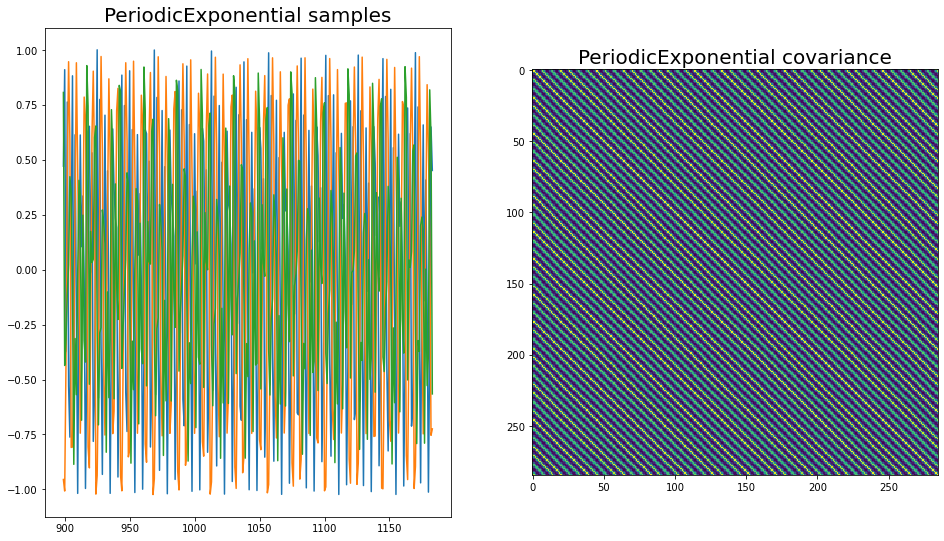

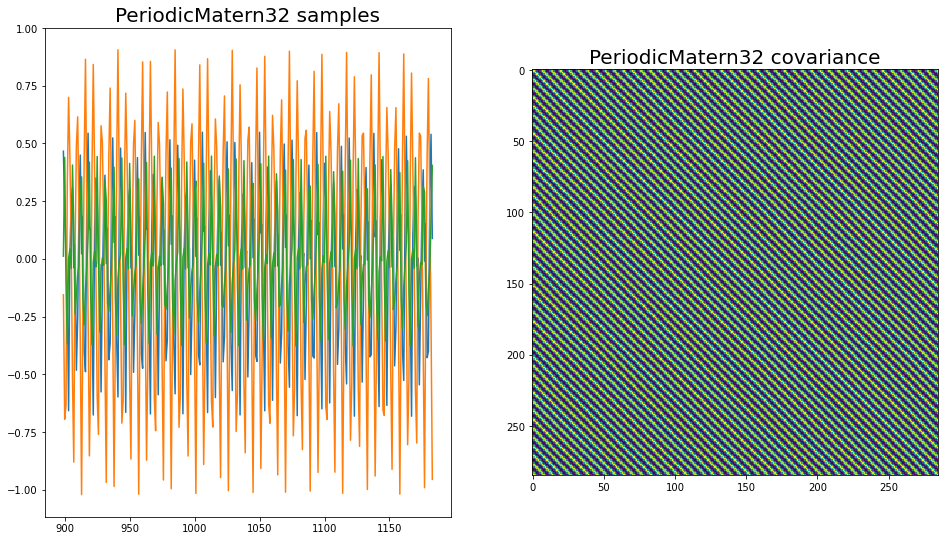

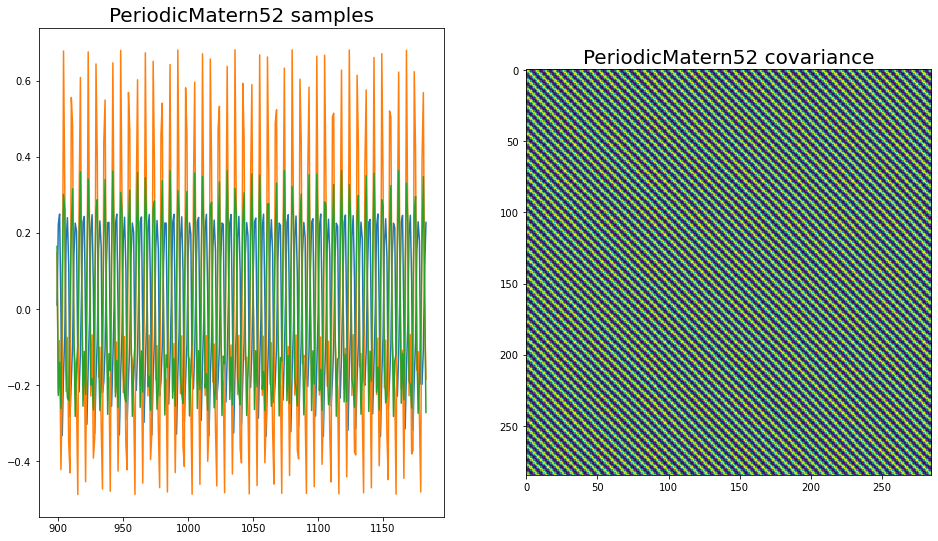

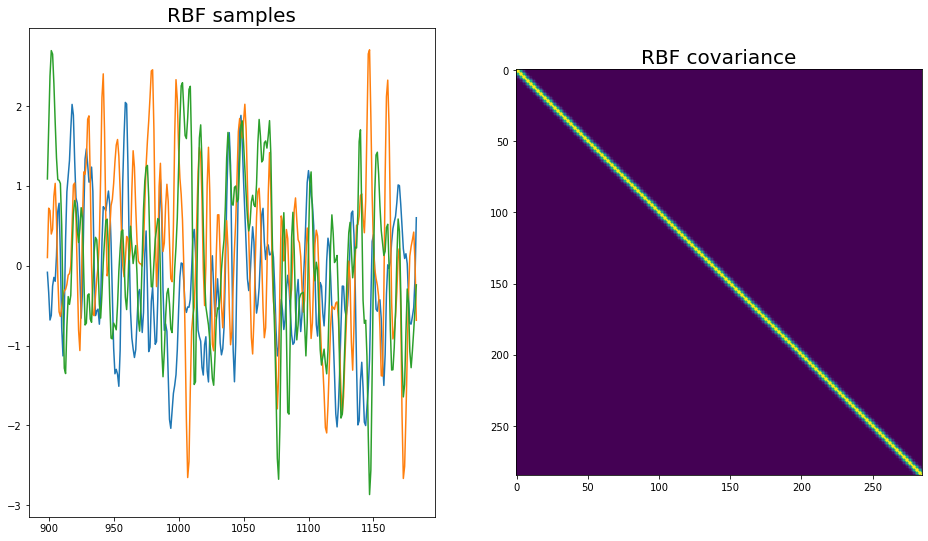

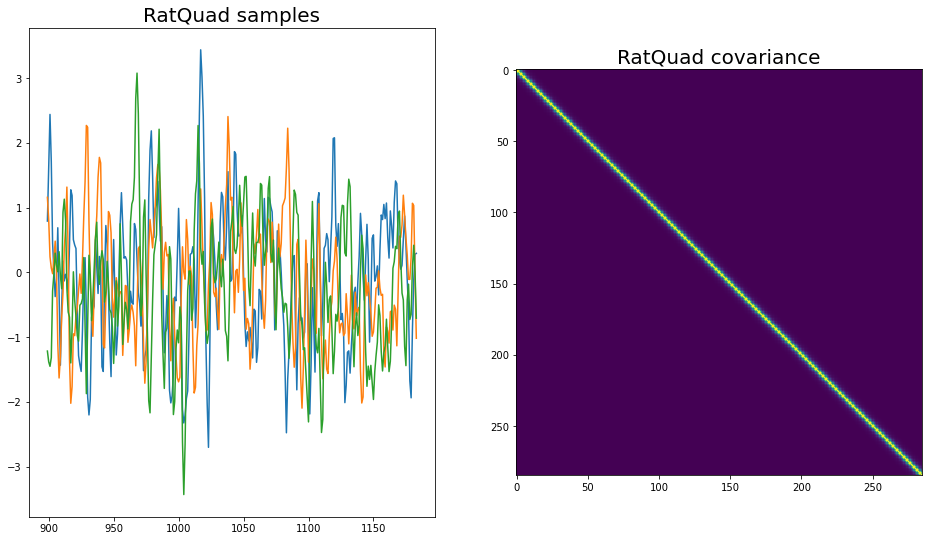

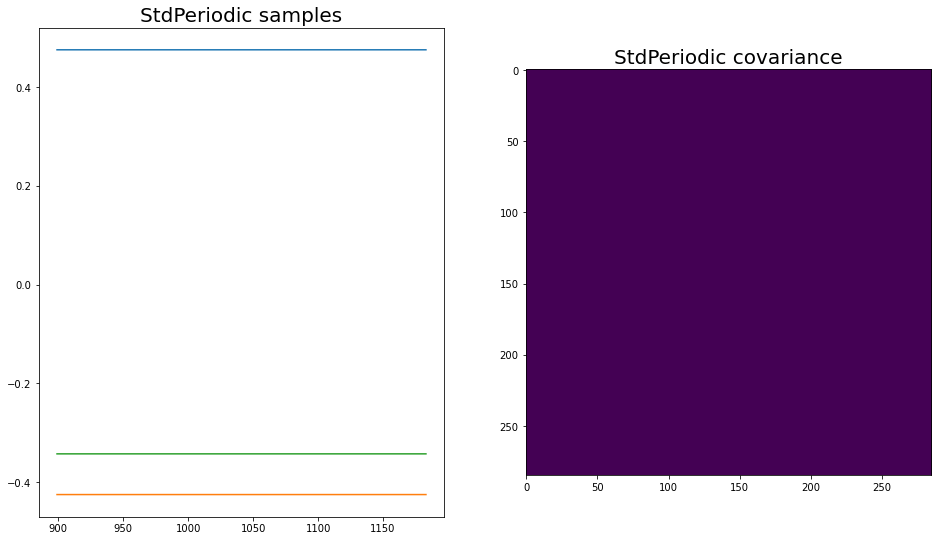

In [4]:
for kernel_name in kern_wlen:
    Kernel = getattr(GPy.kern, kernel_name)

    k = Kernel(input_dim=1)
    X = np.arange(899, 1184, 1) # frequency range in MHz            X = X[:,None] # reshape X to make it n*p --- we try to use 'design matrices' in GPy 
    Z, C = cov_tools.get_kernel_samples(kernel_name, X, 20, l=2)

    fig = plt.figure(figsize=(16,9))     # open a new plotting window
    plt.subplot(121)
    for i in range(3):
        plt.plot(X[:],Z[i,:])
    plt.title('{} samples'.format(kernel_name),fontsize=20)
    plt.subplot(122)
    plt.imshow(C, interpolation='nearest')
    plt.title('{} covariance'.format(kernel_name),fontsize=20)

Next, setting a larger lengthscale (things correlated on large scales instead of small scales)

lengthscale = 200 MHz

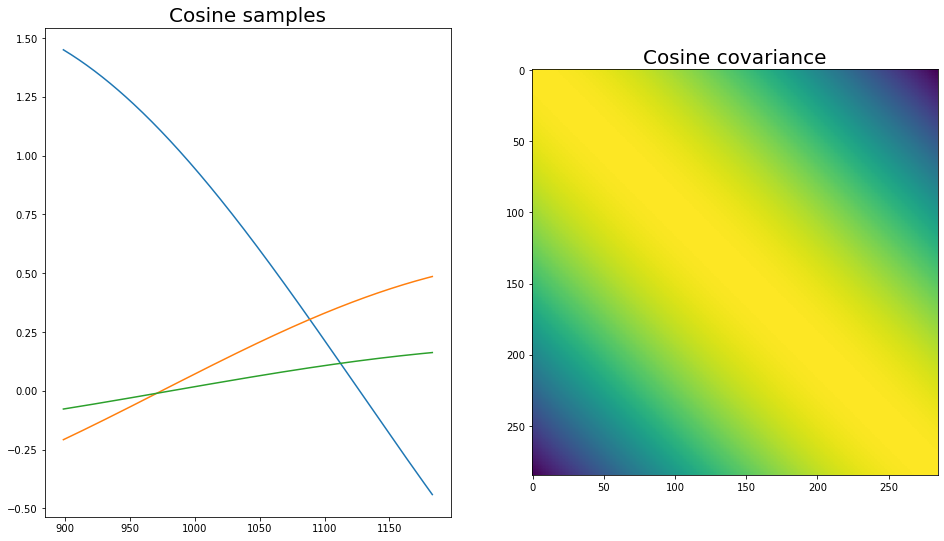

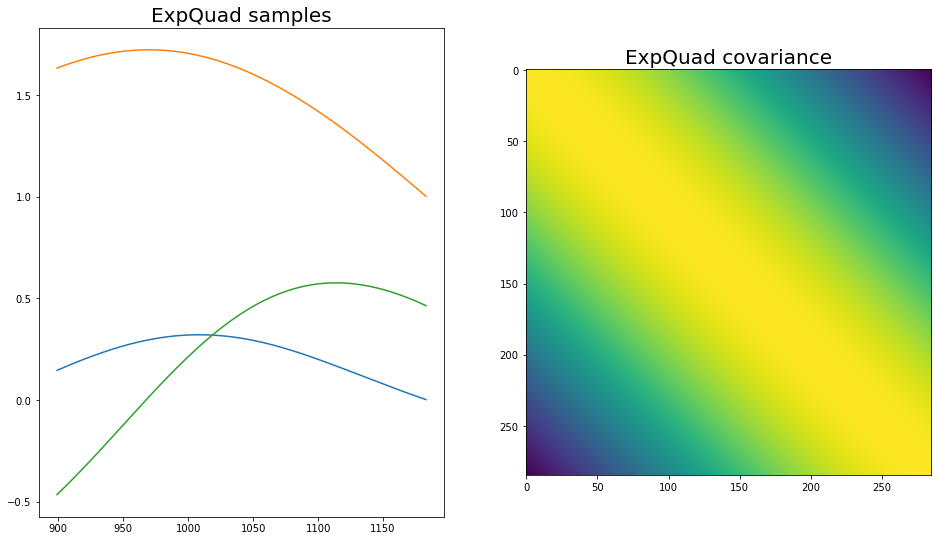

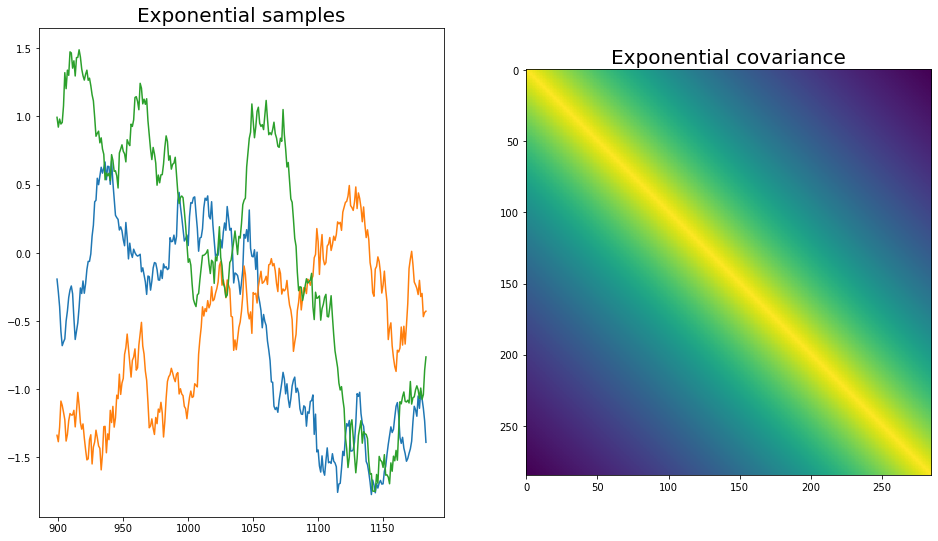

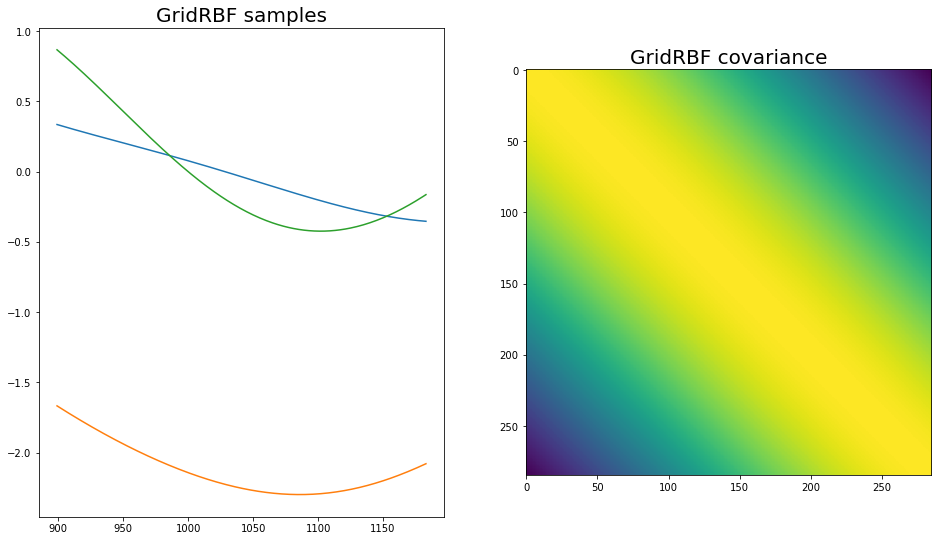

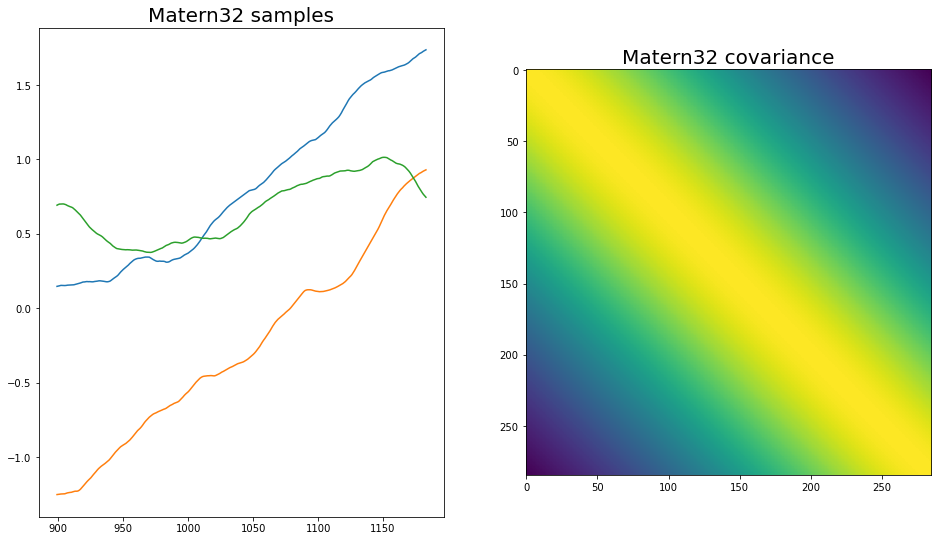

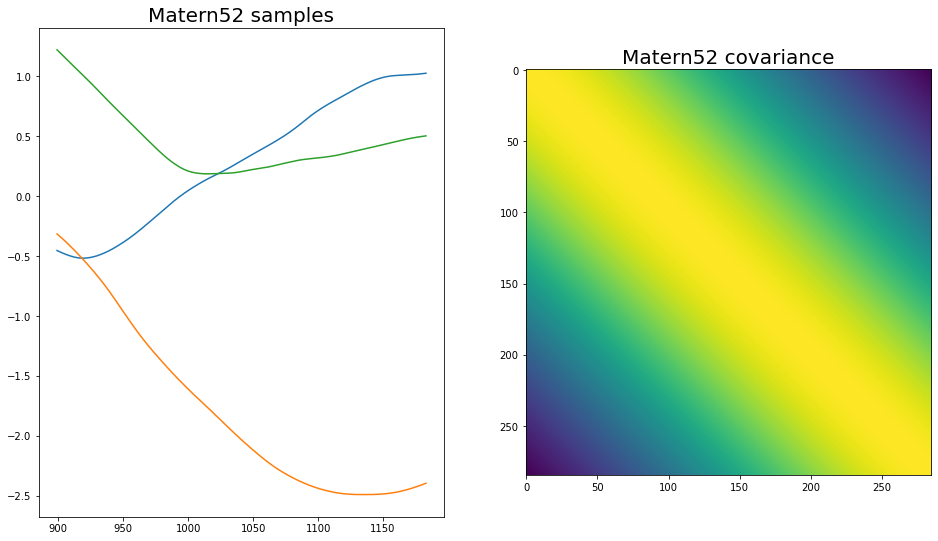

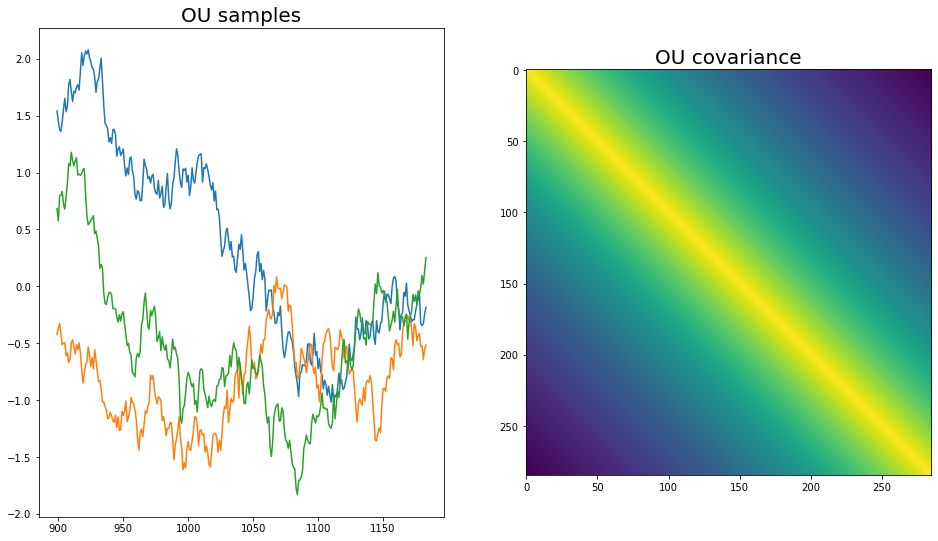

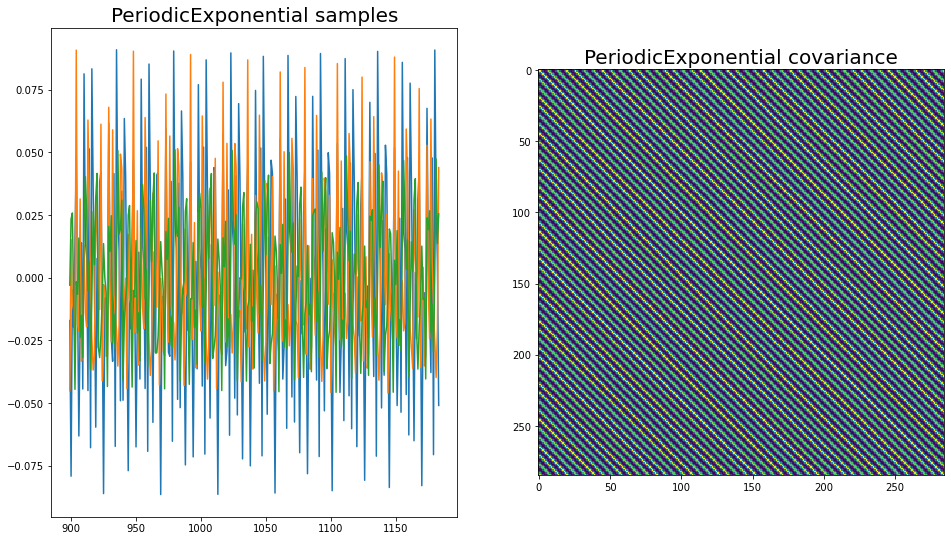

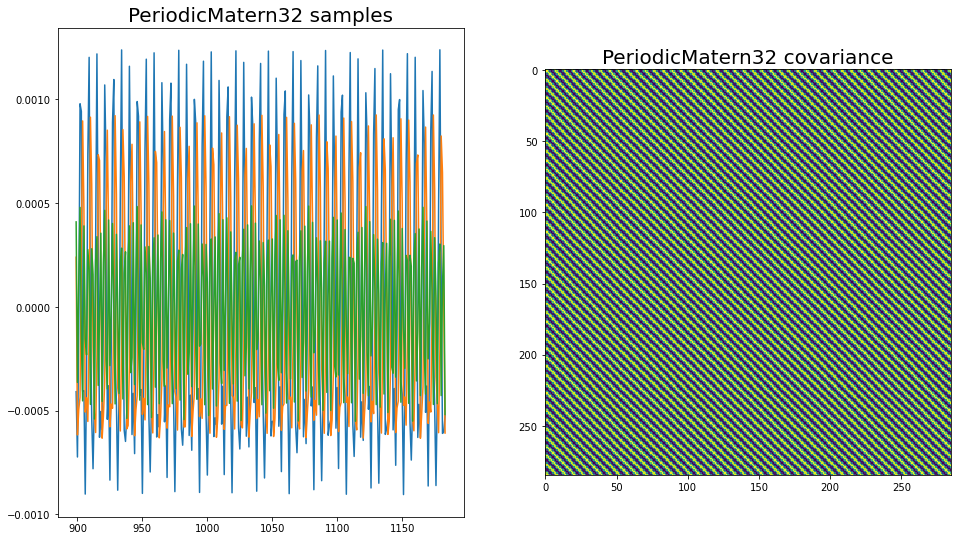

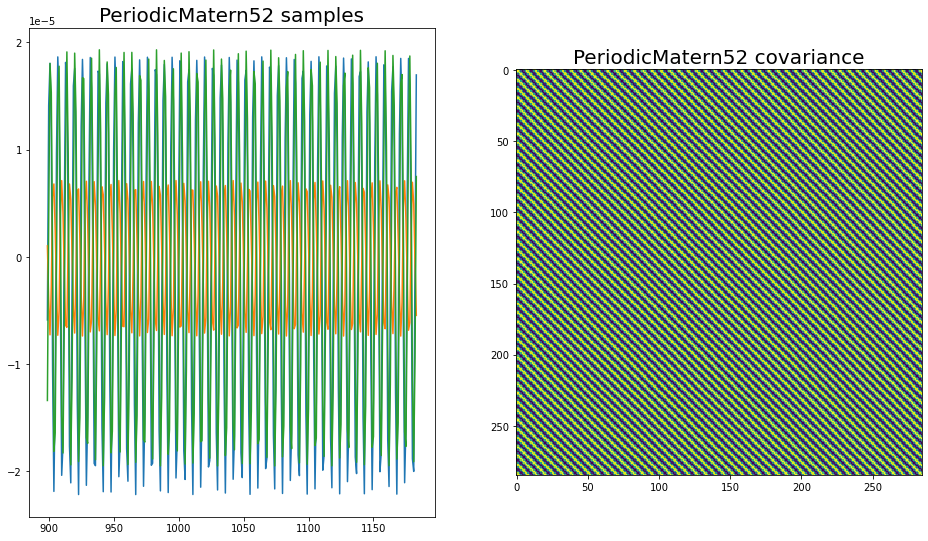

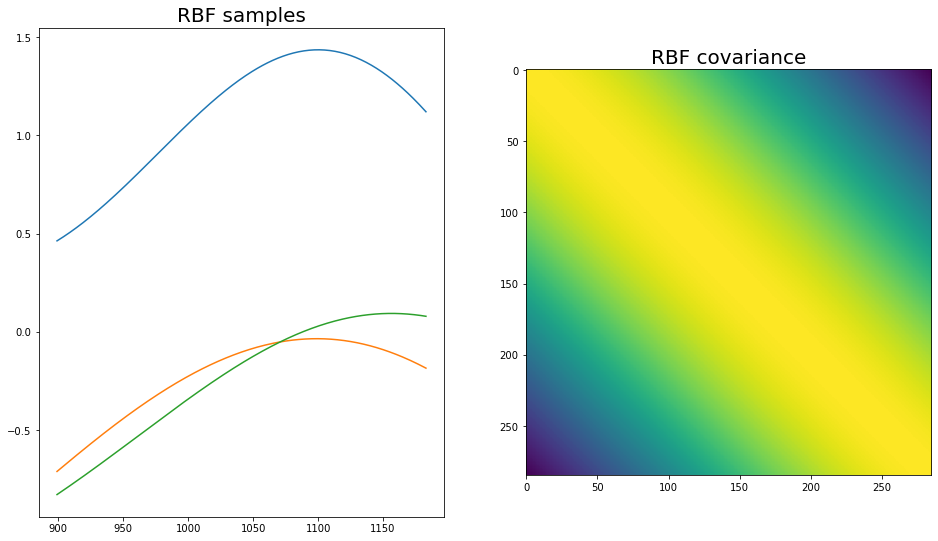

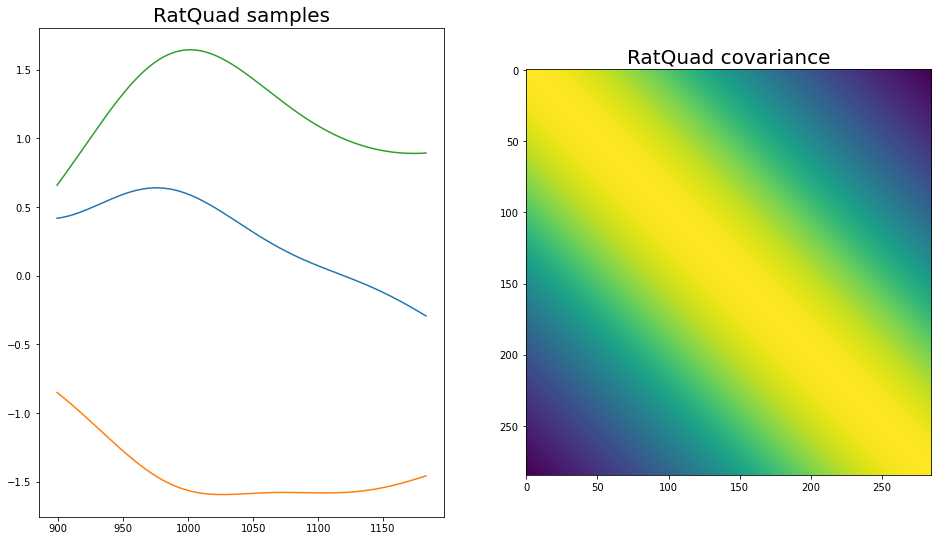

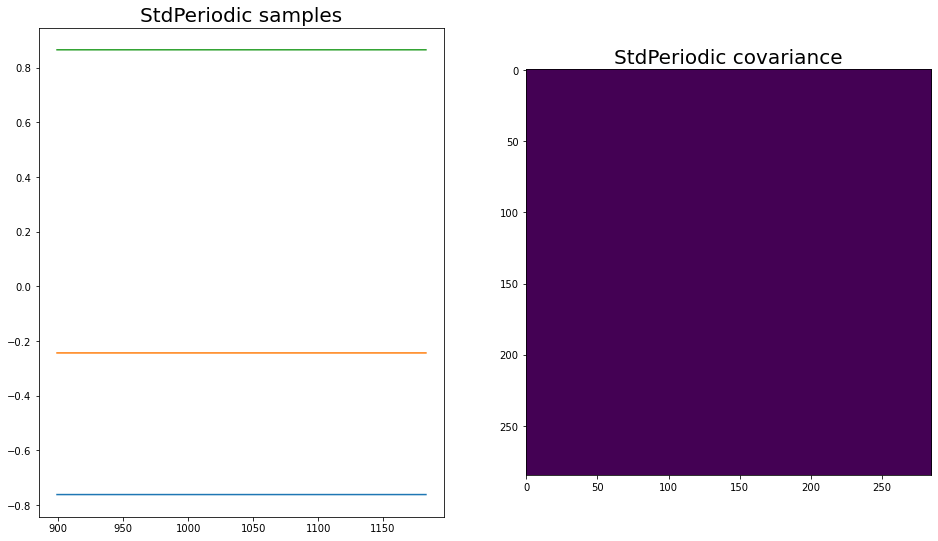

In [5]:
for kernel_name in kern_wlen:
    Kernel = getattr(GPy.kern, kernel_name)

    k = Kernel(input_dim=1)
    X = np.arange(899, 1184, 1) # frequency range in MHz            X = X[:,None] # reshape X to make it n*p --- we try to use 'design matrices' in GPy 
    Z, C = cov_tools.get_kernel_samples(kernel_name, X, 20, l=200)

    fig = plt.figure(figsize=(16,9))     # open a new plotting window
    plt.subplot(121)
    for i in range(3):
        plt.plot(X[:],Z[i,:])
    plt.title('{} samples'.format(kernel_name),fontsize=20)

    plt.subplot(122)
    plt.imshow(C, interpolation='nearest')
    plt.title('{} covariance'.format(kernel_name),fontsize=20)

## Covariance kernels without lengthscales

These are the covariance kernels that do not have lengthscale parameters:

In [6]:
kern_nolen = ['Bias', 'Brownian', 'Linear', 'MLP', 'Poly', 'Spline', 'White']

These are their class functions and functional forms:

### Bias: 

- class: Bias(input_dim, variance=1.0, active_dims=None, name='bias')

### Brownian:

- Brownian motion in 1D only.Negative times are treated as a separate (backwards!) Brownian motion.
- class: Brownian(input_dim=1, variance=1.0, active_dims=None, name='Brownian')

### Linear:  

- class: Linear(input_dim, variances=None, ARD=False, active_dims=None, name='linear')
- functional form: $k(x,y) = \sum_{i=1}^{\text{input_dim}} \sigma^2_i x_iy_i$

### MLP:  

- Multi layer perceptron kernel (also known as arc sine kernel or neural network kernel)
- class: MLP(input_dim, variance=1.0, weight_variance=1.0, bias_variance=1.0, ARD=False, active_dims=None, name='mlp')
- functional form: $k(x,y) = \sigma^{2}\frac{2}{\pi }  \text{asin} \left ( \frac{ \sigma_w^2 x^\top y+\sigma_b^2}{\sqrt{\sigma_w^2x^\top x + \sigma_b^2 + 1}\sqrt{\sigma_w^2 y^\top y + \sigma_b^2 +1}} \right )$

### Poly:

- Polynomial kernel
- class: Poly(input_dim, variance=1.0, scale=1.0, bias=1.0, order=3.0, active_dims=None, name='poly')

### Spline:

- Linear spline kernel. You need to specify 2 parameters: the variance and c. The variance is defined in powers of 10. Thus specifying -2 means 10^-2. The parameter c allows to define the stiffness of the spline fit. A very stiff spline equals linear regression. See https://www.youtube.com/watch?v=50Vgw11qn0o starting at minute 1:17:28 Lit: Wahba, 1990
- class: Spline(input_dim, variance=1.0, c=1.0, active_dims=None, name='spline')

### White:

- class: White(input_dim, variance=1.0, active_dims=None, name='white')

 ../cov_tools.py:73: RuntimeWarning:covariance is not positive-semidefinite.


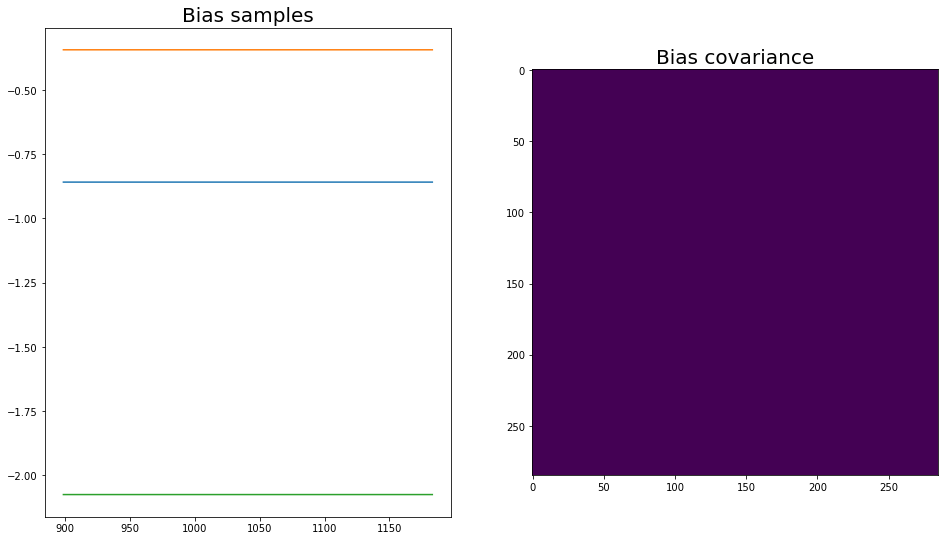

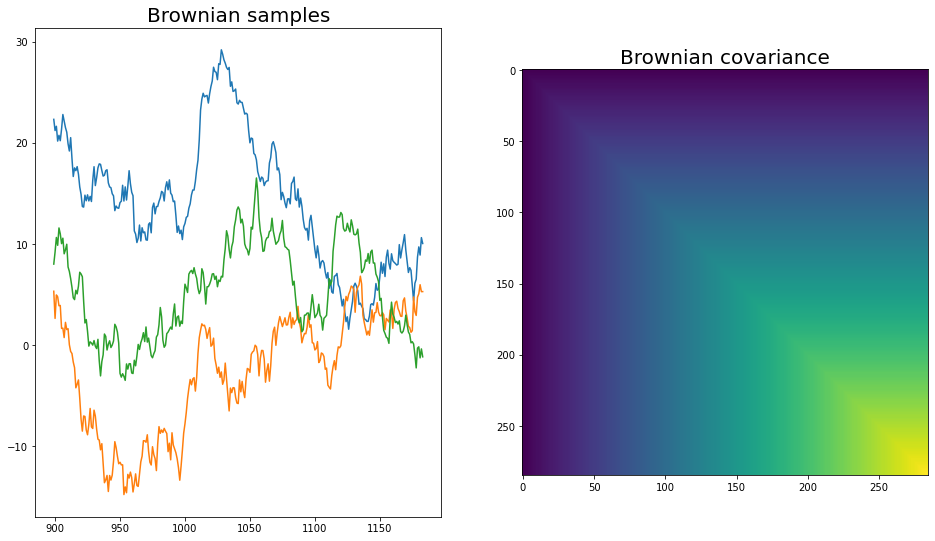

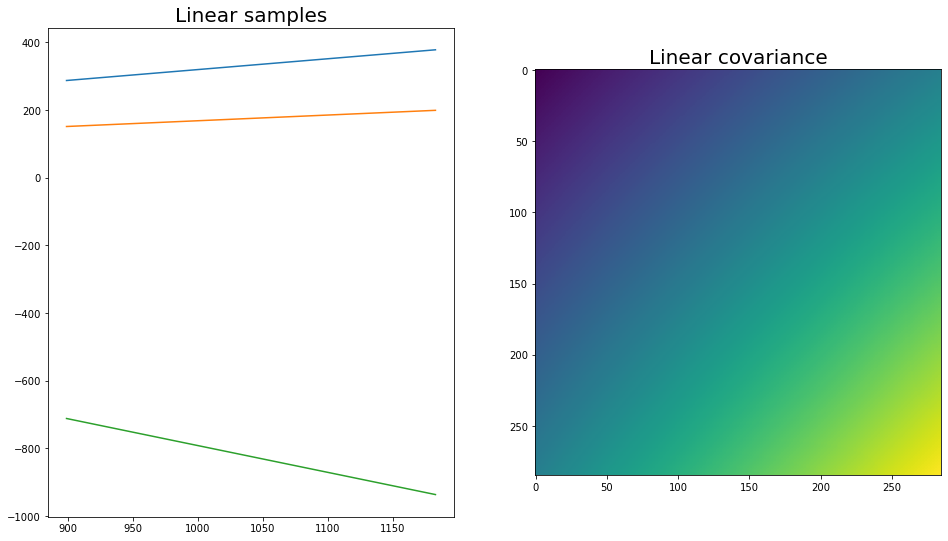

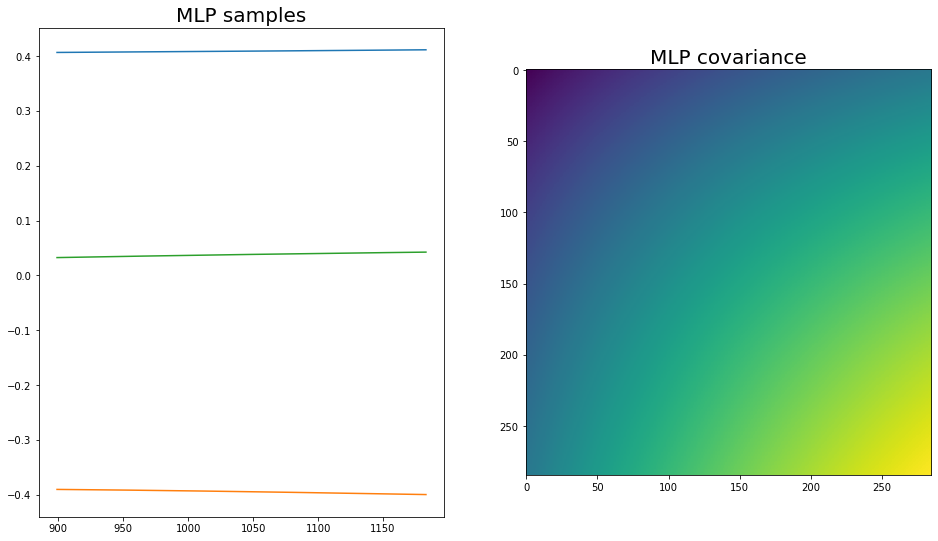

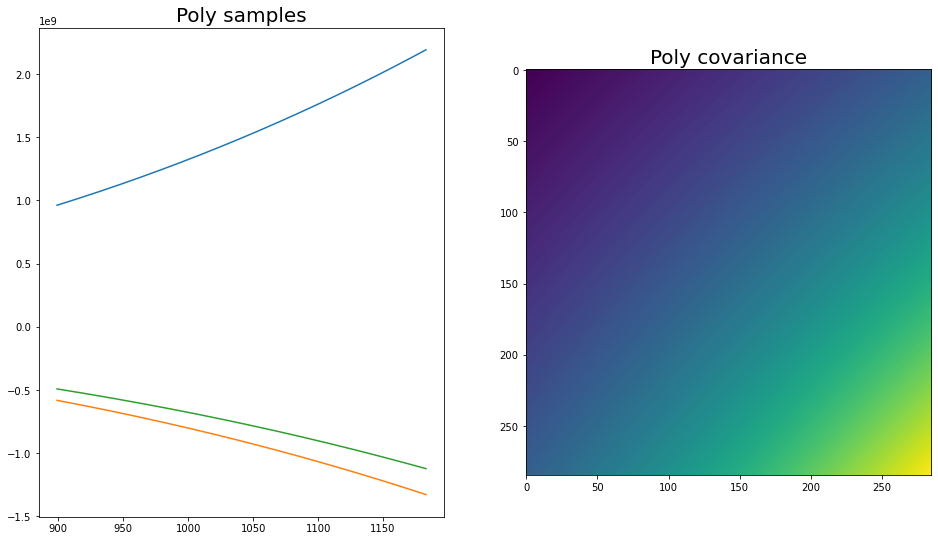

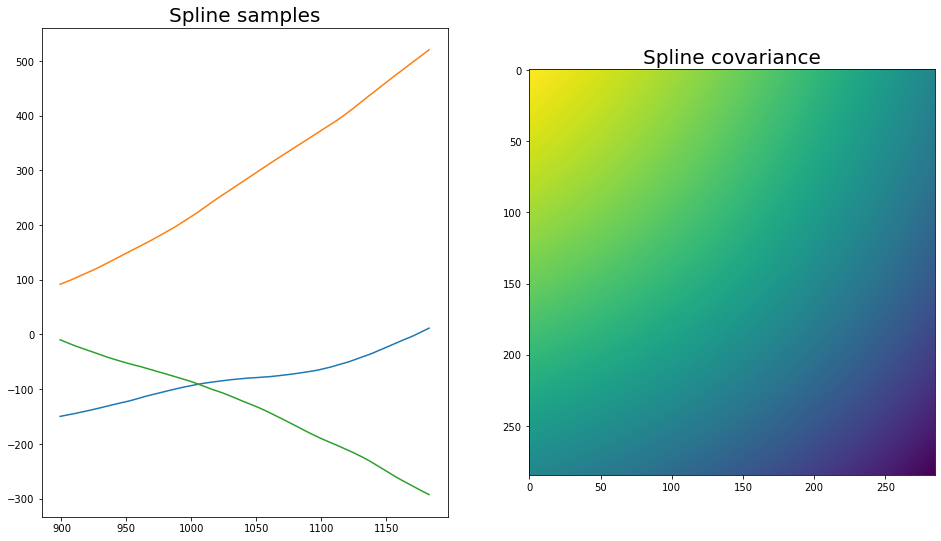

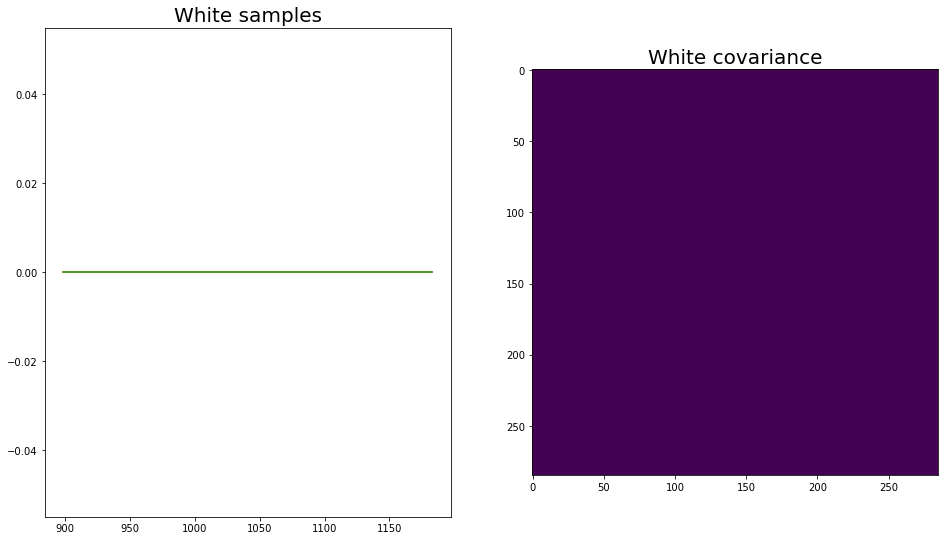

In [7]:
for kernel_name in kern_nolen:
    Kernel = getattr(GPy.kern, kernel_name)

    k = Kernel(input_dim=1)
    X = np.arange(899, 1184, 1) # frequency range in MHz            X = X[:,None] # reshape X to make it n*p --- we try to use 'design matrices' in GPy 
    Z, C = cov_tools.get_kernel_samples(kernel_name, X, 20)

    fig = plt.figure(figsize=(16,9))     # open a new plotting window
    plt.subplot(121)
    for i in range(3):
        plt.plot(X[:],Z[i,:])
    plt.title('{} samples'.format(kernel_name),fontsize=20)

    plt.subplot(122)
    plt.imshow(C, interpolation='nearest')
    plt.title('{} covariance'.format(kernel_name),fontsize=20)